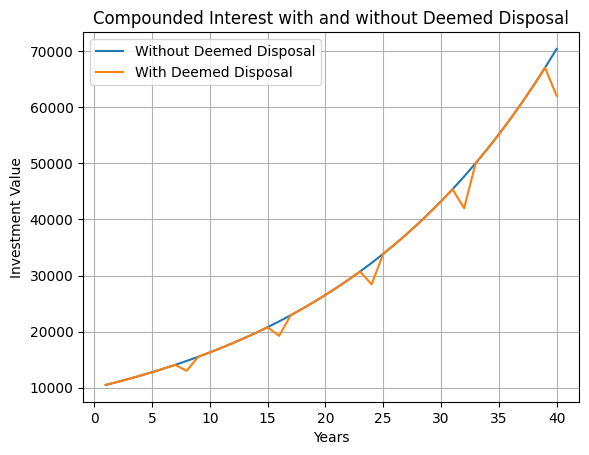

In [3]:
import matplotlib.pyplot as plt

def calculate_compound_interest(principal, interest_rate, years):
    compounded_interest = []
    compounded_interest_with_tax = []
    tax_rate = 0.41  # 41% tax rate

    for year in range(1, years + 1):
        compounded_interest.append(principal * (1 + interest_rate) ** year)
        if year % 8 == 0:
            taxable_profit = compounded_interest[-1] - compounded_interest[-8]
            tax_paid = taxable_profit * tax_rate
            compounded_interest_with_tax.append(compounded_interest[-1] - tax_paid)
        else:
            compounded_interest_with_tax.append(compounded_interest[-1])

    return compounded_interest, compounded_interest_with_tax

# Define the parameters
principal = 10000  # Initial investment amount
interest_rate = 0.05  # Annual interest rate
years = 30  # Number of years to calculate

# Calculate compounded interest
compounded_interest, compounded_interest_with_tax = calculate_compound_interest(principal, interest_rate, years)

# Plot the results
years_range = list(range(1, years + 1))
plt.plot(years_range, compounded_interest, label='Without Deemed Disposal')
plt.plot(years_range, compounded_interest_with_tax, label='With Deemed Disposal')
plt.xlabel('Years')
plt.ylabel('Investment Value')
plt.title('Compounded Interest with and without Deemed Disposal')
plt.legend()
plt.grid(True)
plt.show()


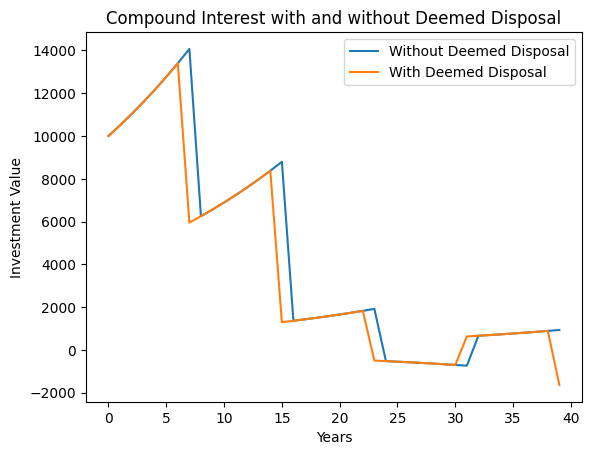

In [4]:
import matplotlib.pyplot as plt

# Function to calculate compounded interest
def calculate_compound_interest(principal, rate, time):
    return principal * (1 + rate) ** time

# Variables
principal = 10000  # Initial investment amount
rate = 0.05  # Annual interest rate
years = 40  # Number of years

# Lists to store values
without_tax_values = []
with_tax_values = []

# Calculate compounded interest for both scenarios
for year in range(years):
    without_tax_values.append(calculate_compound_interest(principal, rate, year))
    if (year + 1) % 8 == 0:
        tax = without_tax_values[-1] * 0.41
        principal -= tax
    with_tax_values.append(calculate_compound_interest(principal, rate, year))

# Plotting the graph
plt.plot(range(years), without_tax_values, label='Without Deemed Disposal')
plt.plot(range(years), with_tax_values, label='With Deemed Disposal')
plt.xlabel('Years')
plt.ylabel('Investment Value')
plt.title('Compound Interest with and without Deemed Disposal')
plt.legend()
plt.show()


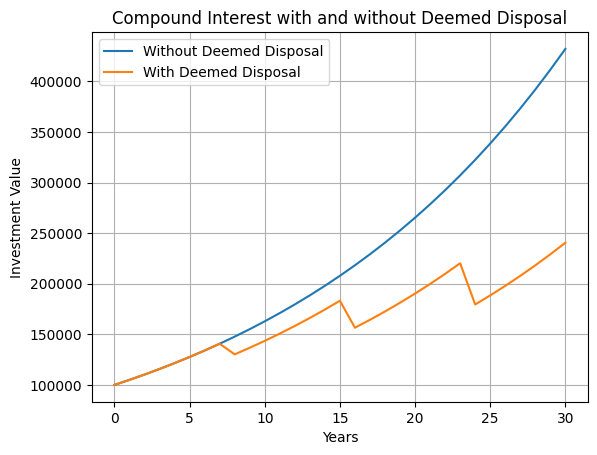

In [6]:
import matplotlib.pyplot as plt

initial_investment = 100000
annual_return = 0.05
tax_rate = 0.41

years = list(range(31))  # 16 years (0 to 16)

# Calculate compounded interest without deemed disposal
investment_without_tax = [initial_investment * (1 + annual_return) ** year for year in years]

# Calculate compounded interest with deemed disposal
investment_with_tax = []
investment_with_tax.append(initial_investment)  # Initial investment

for year in years[1:]:
    # Check if it's the 8th year (deemed disposal)
    if year % 8 == 0:
        profit = investment_with_tax[year - 1] - initial_investment
        tax_paid = profit * tax_rate
        investment_after_tax = investment_with_tax[year - 1] - tax_paid
        investment_with_tax.append(investment_after_tax * (1 + annual_return))
    else:
        investment_with_tax.append(investment_with_tax[year - 1] * (1 + annual_return))

# Plot the results
plt.plot(years, investment_without_tax, label='Without Deemed Disposal')
plt.plot(years, investment_with_tax, label='With Deemed Disposal')
plt.xlabel('Years')
plt.ylabel('Investment Value')
plt.title('Compound Interest with and without Deemed Disposal')
plt.legend()
plt.grid(True)
plt.show()


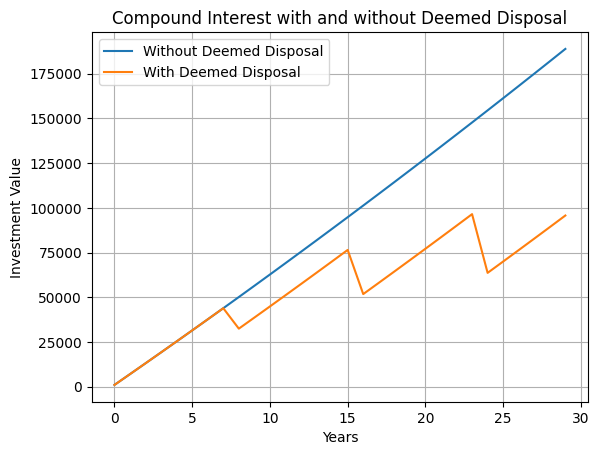

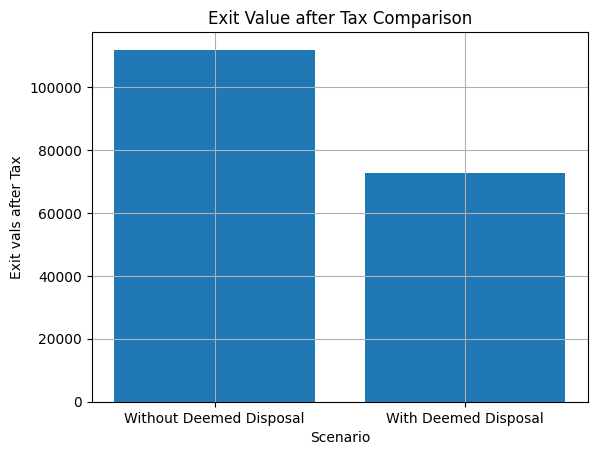

Final Investment Value Difference: 39027.877527397824


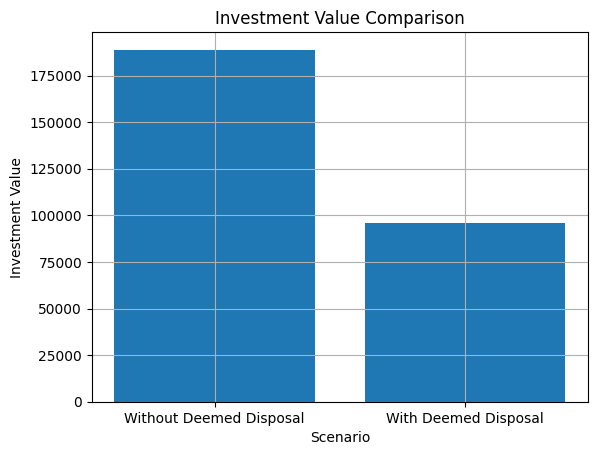

Final Investment Value Without Deemed Disposal: 188835.72144744484
Exit Tax Applied Without Deemed Disposal: 387.11322896726193
Final Investment Value With Deemed Disposal: 95704.12627172489
Exit Tax Applied With Deemed Disposal: 22908.92814513025


In [20]:
import matplotlib.pyplot as plt

initial_investment = 1000
annual_return = 0.005
tax_rate = 0.41
exit_tax_rate = 0.41

years = list(range(30))  # range in years

yearly_contribution = 6000

# Calculate compounded interest without deemed disposal
# investment_without_tax = [initial_investment * (1 + annual_return) ** year for year in years]

# Calculate compounded interest without deemed disposal
investment_without_tax = [initial_investment]
total_interest_without_tax = 0

for year in years[1:]:
    investment = investment_without_tax[year - 1] + yearly_contribution
    investment_without_tax.append(investment * (1 + annual_return))
    total_interest_without_tax += yearly_contribution

# Calculate compounded interest with deemed disposal
investment_with_tax = []
investment_with_tax.append(initial_investment)  # Initial investment

# for year in years[1:]:
#     # Check if it's the 8th year (deemed disposal)
#     if year % 8 == 0:
#         profit = investment_with_tax[year - 1] - initial_investment
#         tax_paid = profit * tax_rate
#         investment_after_tax = investment_with_tax[year - 1] - tax_paid
#         investment_with_tax.append(investment_after_tax * (1 + annual_return))
#     else:
#         investment_with_tax.append(investment_with_tax[year - 1] * (1 + annual_return))

for year in years[1:]:
    # Check if it's the 8th year (deemed disposal)
    if year % 8 == 0:
        profit = investment_with_tax[year - 1] - initial_investment
        tax_paid = profit * tax_rate
        investment_after_tax = investment_with_tax[year - 1] - tax_paid + yearly_contribution
        investment_with_tax.append(investment_after_tax * (1 + annual_return))
        total_interest_with_tax += yearly_contribution - tax_paid
    else:
        investment = investment_with_tax[year - 1] + yearly_contribution
        investment_with_tax.append(investment * (1 + annual_return))
        total_interest_with_tax += yearly_contribution
        
# Plot the results
plt.plot(years, investment_without_tax, label='Without Deemed Disposal')
plt.plot(years, investment_with_tax, label='With Deemed Disposal')
plt.xlabel('Years')
plt.ylabel('Investment Value')
plt.title('Compound Interest with and without Deemed Disposal')
plt.legend()
plt.grid(True)
plt.show()

# Apply exit tax to the final values
final_investment_without_tax = investment_without_tax[-1]
exit_tax_without_tax = final_investment_without_tax * annual_return * exit_tax_rate

final_investment_with_tax = investment_with_tax[-1]
profit_with_tax = final_investment_with_tax - initial_investment
tax_paid_already = profit_with_tax * tax_rate
exit_tax_with_tax = (profit_with_tax - tax_paid_already) * exit_tax_rate

# total interest
total_interest_with_tax = profit_with_tax - tax_paid_already

# Plot the exit taxes

# Apply the exit taxes to the investments
final_interest_withoutDeemed_disposal = final_investment_without_tax - initial_investment
investment_final_value_without_deemed_disposal = final_investment_without_tax - final_interest_withoutDeemed_disposal * 0.41

investment_final_value_with_deemed_disposal = final_investment_with_tax - total_interest_with_tax * 0.41

labels = ['Without Deemed Disposal', 'With Deemed Disposal']
exit_values_after_tax = [investment_final_value_without_deemed_disposal, investment_final_value_with_deemed_disposal]

x = np.arange(len(labels))
plt.bar(x, exit_values_after_tax)
plt.xticks(x, labels)
plt.xlabel('Scenario')
plt.ylabel('Exit vals after Tax')
plt.title('Exit Value after Tax Comparison')
plt.grid(True)
plt.show()

print("Final Investment Value Difference:", investment_final_value_without_deemed_disposal - investment_final_value_with_deemed_disposal)


# Plot the final values
labels = ['Without Deemed Disposal', 'With Deemed Disposal']
exit_taxes = [final_investment_without_tax, final_investment_with_tax]

x = np.arange(len(labels))
plt.bar(x, exit_taxes)
plt.xticks(x, labels)
plt.xlabel('Scenario')
plt.ylabel('Investment Value')
plt.title('Investment Value Comparison')
plt.grid(True)
plt.show()

# Display results
print("Final Investment Value Without Deemed Disposal:", final_investment_without_tax)
print("Exit Tax Applied Without Deemed Disposal:", exit_tax_without_tax)
print("Final Investment Value With Deemed Disposal:", final_investment_with_tax)
print("Exit Tax Applied With Deemed Disposal:", exit_tax_with_tax)


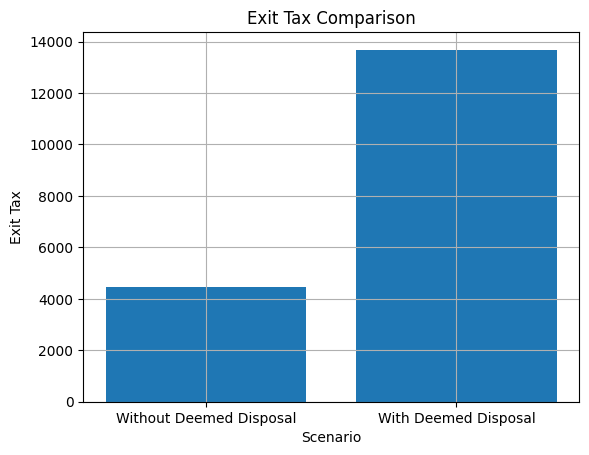